# Importing kaggle Dataset

In [130]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [131]:
# !kaggle datasets download -d kartik2112/fraud-detection

In [132]:
# !unzip fraud-detection.zip

# Important Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix, accuracy_score

# Data Preprocessing

In [134]:
train_data = pd.read_csv("fraudTrain.csv")
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [135]:
test_data = pd.read_csv("fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [136]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [137]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [138]:
train_data.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [139]:
test_data.is_fraud.value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

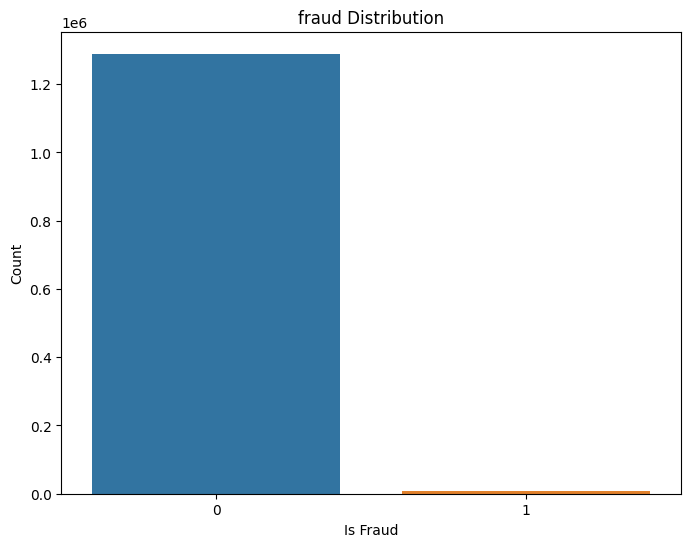

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('fraud Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [141]:
combined_df=pd.concat([train_data, test_data], ignore_index=True)
data=combined_df

In [142]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


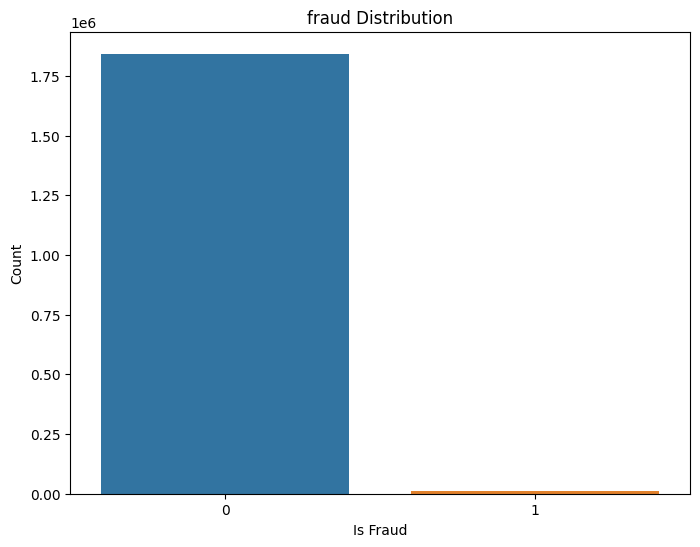

In [143]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data)
plt.title('fraud Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [144]:
data.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

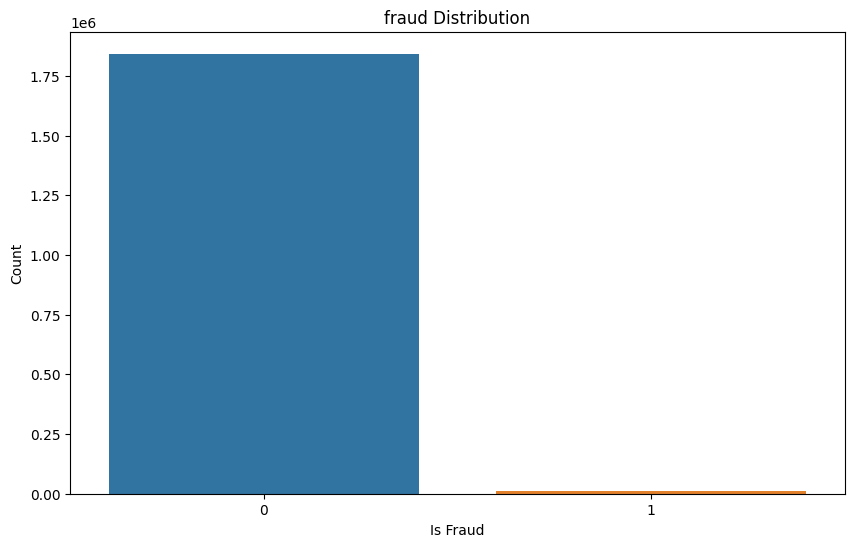

In [145]:
plt.figure(figsize = (10,6))
sns.countplot(x='is_fraud', data=data)
plt.title('fraud Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# Balancing the unbalaced dataset

Distributing legit and fraud transactions


In [146]:
legit = data[data.is_fraud == 0]
fraud = data[data.is_fraud == 1]

In [147]:
print(legit.shape)
print(fraud.shape)

(1842743, 23)
(9651, 23)


In [148]:
legit.amt.describe()

count    1.842743e+06
mean     6.765128e+01
std      1.535481e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.724000e+01
75%      8.256000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [149]:
fraud.amt.describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

In [150]:
data.groupby('is_fraud').mean()

<ipython-input-150-5098c4639619>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('is_fraud').mean()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,537179.530738,4.174926e+17,67.651278,48817.519363,38.538245,-90.228849,88636.579284,1.358692e+09,38.537950,-90.228935
1,539849.247228,3.970393e+17,530.661412,47999.638379,38.742813,-90.033730,89998.422961,1.355323e+09,38.734962,-90.037919


Under sampleing

In [151]:
legit_sample = legit.sample(n=9651)

In [152]:
new_data = pd.concat([legit_sample,fraud], axis = 0)

In [153]:
new_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1785479,488804,2020-12-16 23:31:23,4128027264554082,fraud_Erdman-Durgan,health_fitness,124.42,Kyle,Park,M,7507 Larry Passage Suite 859,...,39.8788,-82.1880,1831,Barrister's clerk,1953-10-18,ee77e9d69bcdbc22defa294b8a5b9039,1387236683,40.858274,-82.423813,0
1147200,1147200,2020-04-23 02:15:02,3568255211412877,"fraud_Zieme, Bode and Dooley",gas_transport,83.97,Timothy,Gomez,M,707 Anthony Causeway,...,41.2249,-85.0301,5341,Biomedical engineer,1994-11-24,ea0f71131ec2c06351da7f20658c25d6,1366683302,40.985738,-85.324011,0
492162,492162,2019-08-03 07:32:19,4550599031376731,fraud_Thiel-Thiel,entertainment,21.92,Angela,West,F,9471 Wong Islands,...,40.7559,-82.5123,92985,Press photographer,1968-05-29,6028ad829239f521e14c7a51379d0ac4,1343979139,41.327477,-83.079019,0
1060554,1060554,2020-03-16 10:24:02,4561892980175,"fraud_Stanton, Jakubowski and Baumbach",shopping_net,5.48,Jacqueline,Allen,F,166 Lisa Fords,...,39.5960,-86.1309,78968,Financial adviser,1968-02-10,9245c3e587132b86b9d65be73fffe878,1363429442,40.250173,-86.089630,0
1347904,51229,2020-07-08 17:04:11,2280870154157385,fraud_Nienow PLC,entertainment,34.92,Katherine,Cooper,F,3854 Lauren Springs Suite 648,...,40.0994,-89.9601,530,Transport planner,1967-09-23,bc30ccf20492bc0a6883b386c4fc8920,1373303051,41.084543,-89.913181,0


In [154]:
new_data.is_fraud.value_counts()

0    9651
1    9651
Name: is_fraud, dtype: int64

In [155]:
new_data.groupby('is_fraud').mean()

<ipython-input-155-72bbc9f1ce9b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_data.groupby('is_fraud').mean()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,536500.830277,4.269809e+17,67.252688,49032.623355,38.535429,-90.335641,90445.020930,1.359022e+09,38.540801,-90.321773
1,539849.247228,3.970393e+17,530.661412,47999.638379,38.742813,-90.033730,89998.422961,1.355323e+09,38.734962,-90.037919


Removing unnecessary columns

In [156]:
new_data = new_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first',
                              'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
new_data = pd.get_dummies(new_data, columns=['category'], drop_first=True)

new_data['gender'] = new_data['gender'].map({'M': 0, 'F': 1})


In [157]:
new_data

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
1785479,4128027264554082,124.42,0,39.8788,-82.1880,1831,1387236683,40.858274,-82.423813,0,...,0,1,0,0,0,0,0,0,0,0
1147200,3568255211412877,83.97,0,41.2249,-85.0301,5341,1366683302,40.985738,-85.324011,0,...,0,0,0,0,0,0,0,0,0,0
492162,4550599031376731,21.92,1,40.7559,-82.5123,92985,1343979139,41.327477,-83.079019,0,...,0,0,0,0,0,0,0,0,0,0
1060554,4561892980175,5.48,1,39.5960,-86.1309,78968,1363429442,40.250173,-86.089630,0,...,0,0,0,0,0,0,0,1,0,0
1347904,2280870154157385,34.92,1,40.0994,-89.9601,530,1373303051,41.084543,-89.913181,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2242176657877538,1041.51,0,34.6323,-89.8855,14462,1387749948,34.573471,-89.911011,1,...,0,0,0,0,0,0,0,0,1,0
1813949,2242176657877538,868.09,0,34.6323,-89.8855,14462,1387750687,34.091227,-90.390612,1,...,0,0,0,0,0,0,0,0,1,0
1814016,2242176657877538,1039.42,0,34.6323,-89.8855,14462,1387751508,34.628434,-90.284780,1,...,0,0,0,0,0,0,0,1,0,0
1814204,2242176657877538,289.27,0,34.6323,-89.8855,14462,1387753563,34.746063,-90.401093,1,...,1,0,0,0,0,0,0,0,0,0


# Scaling columns

In [158]:
X = new_data.drop(['is_fraud'], axis=1)
y = new_data['is_fraud']
scaler = StandardScaler()
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [159]:
X

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
1785479,4128027264554082,-0.472820,0,0.242294,0.570202,-0.287409,1.650387,0.430849,0.552271,0,...,0,1,0,0,0,0,0,0,0,0
1147200,3568255211412877,-0.582398,0,0.505388,0.367547,-0.275996,0.522103,0.455583,0.345761,0,...,0,0,0,0,0,0,0,0,0,0
492162,4550599031376731,-0.750492,1,0.413722,0.547078,0.008985,-0.724248,0.521894,0.505617,0,...,0,0,0,0,0,0,0,0,0,0
1060554,4561892980175,-0.795027,1,0.187021,0.289055,-0.036592,0.343481,0.312852,0.291245,0,...,0,0,0,0,0,0,0,1,0,0
1347904,2280870154157385,-0.715275,1,0.285410,0.016014,-0.291639,0.885496,0.474755,0.018988,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2242176657877538,2.011571,0,-0.783129,0.021333,-0.246338,1.678563,-0.788666,0.019142,0,...,0,0,0,0,0,0,0,0,1,0
1813949,2242176657877538,1.541777,0,-0.783129,0.021333,-0.246338,1.678603,-0.882241,-0.015008,0,...,0,0,0,0,0,0,0,0,1,0
1814016,2242176657877538,2.005909,0,-0.783129,0.021333,-0.246338,1.678648,-0.778001,-0.007472,0,...,0,0,0,0,0,0,0,1,0,0
1814204,2242176657877538,-0.026242,0,-0.783129,0.021333,-0.246338,1.678761,-0.755176,-0.015754,0,...,1,0,0,0,0,0,0,0,0,0


In [160]:
y

1785479    0
1147200    0
492162     0
1060554    0
1347904    0
          ..
1813872    1
1813949    1
1814016    1
1814204    1
1814246    1
Name: is_fraud, Length: 19302, dtype: int64

# Splitting Data

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state = 0)

In [162]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Models and Training

# Performing Logistic Regression

In [163]:
Lg = LogisticRegression()
classifier = Lg.fit(X_train,y_train)

In [164]:
X_train_pred = classifier.predict(X_train)
train_data_acc = accuracy_score(X_train_pred, y_train)

In [165]:
print("Accuracy on training data = ", train_data_acc)

Accuracy on training data =  0.8261122984262678


In [166]:
X_test_pred = classifier.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, y_test)

In [167]:
print("Accuracy on test data = ", test_data_acc)

Accuracy on test data =  0.8142968142968143


# performing Random Forest Classification

In [168]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 2)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=2)

In [169]:
X_train_pred = classifier.predict(X_train)
train_data_acc = accuracy_score(X_train_pred, y_train)

In [170]:
print("Accuracy on training data = ", train_data_acc)

Accuracy on training data =  1.0


In [171]:
X_test_pred = classifier.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, y_test)

In [172]:
print("Accuracy on test data = ", test_data_acc)

Accuracy on test data =  0.9595959595959596


# Performing Decision Tree Classification

In [173]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [174]:
X_train_pred = classifier.predict(X_train)
train_data_acc = accuracy_score(X_train_pred, y_train)

In [175]:
print("Accuracy on training data = ", train_data_acc)

Accuracy on training data =  1.0


In [176]:
X_test_pred = classifier.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, y_test)

In [177]:
print("Accuracy on test data = ", test_data_acc)

Accuracy on test data =  0.9531209531209531


# Conclusion

In the end we have come on this conclusion
Logistic regression accuracy is 81.3%
Random Forest classification accuracy is 95.9%
Decision Tree classification accuracy is 95.3%

By this we get to know that the Random Forest classification is best algo on this dataset
